[![View notebook on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/ralshamrani/Data-Science-and-AI-Workshops/tree/main/Colab%20Notebooks/From_Statistics_to_AI_Workshop_.ipynb)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1bNRiunBzWuhhGn3tBB7TL5Ua0JZ75Ebq?usp=sharing)

# From Statistics to AI — Detailed Workshop Notebook

**Instructor:** Dr. Rayan Alshamrani

**Overview:**
This notebook provides a detailed, pedagogical walkthrough of the statistical foundations that underpin modern AI. It includes conceptual explanations, worked examples, and runnable Python demonstrations for key topics:

- Descriptive statistics
- Probability & uncertainty
- Bivariate analysis & correlation
- Hypothesis testing
- Regression & predictive modeling
- Statistical learning & predictive modeling (classification example)
- Mapping classical statistics -> AI, and ethics

---


## 1 - Descriptive Statistics (Understanding and Summarizing Data)

Goal: Describe raw data before modeling. Misleading summaries lead to incorrect inferences.

Concepts to cover:
- Mean, median, mode (central tendency)
- Variance, standard deviation (dispersion)
- Distribution types: normal (Gaussian)
- Frequency tables and categorical summaries
- Sampling and bias: how sampling affects representativeness

In [ ]:
# Descriptive statistics demo with real dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load tips dataset
df = sns.load_dataset('tips')

# Select numeric columns for analysis
numeric_cols = ['total_bill', 'tip', 'size']

df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
display(df[numeric_cols].describe())

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Central Tendency:


,total_bill,tip,size
mean,19.785943,2.998279,2.569672
median,17.795000,2.900000,2.000000


Mode of total_bill: 13.42
Mode of tip: 2.0
Mode of size: 2

Dispersion:


,total_bill,tip,size
var,79.252939,1.914455,0.904591
std,8.902412,1.383638,0.951100



Distribution Types:


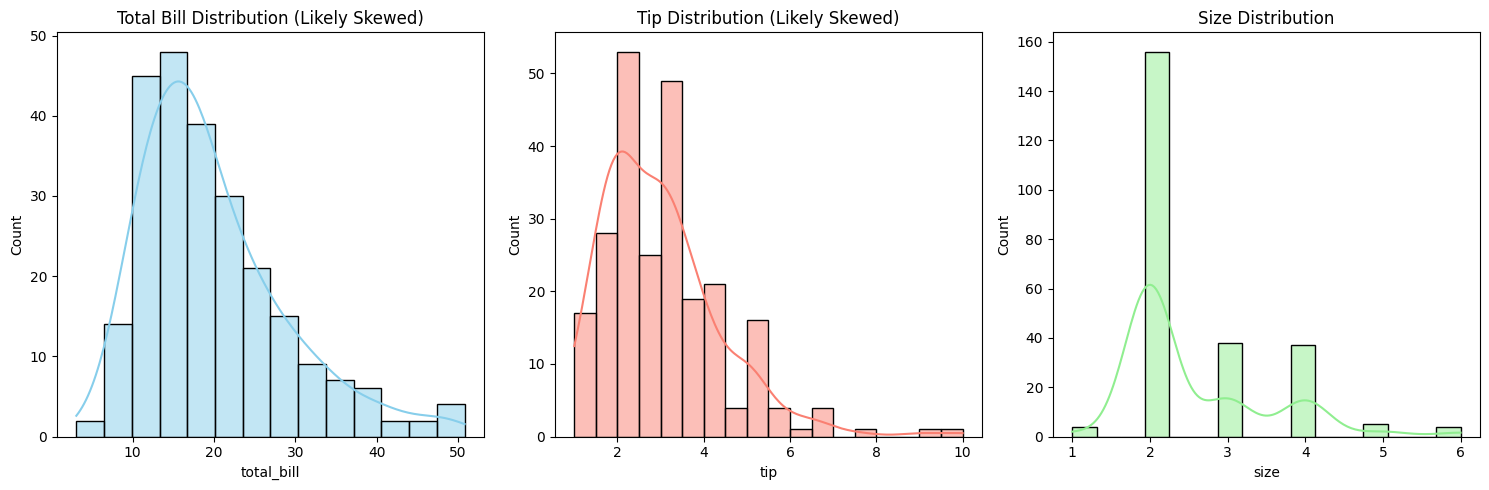

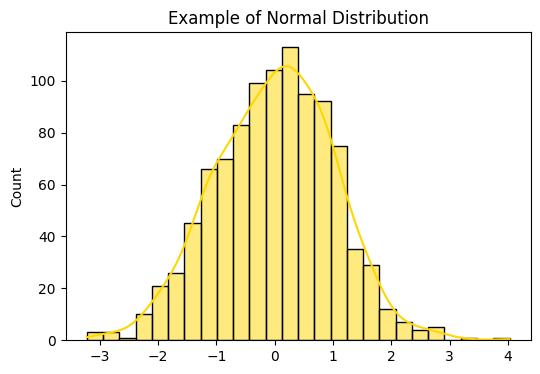

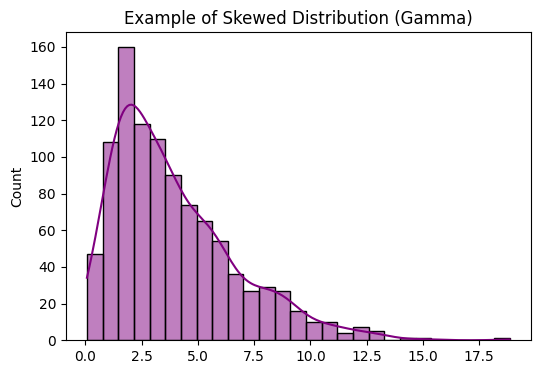

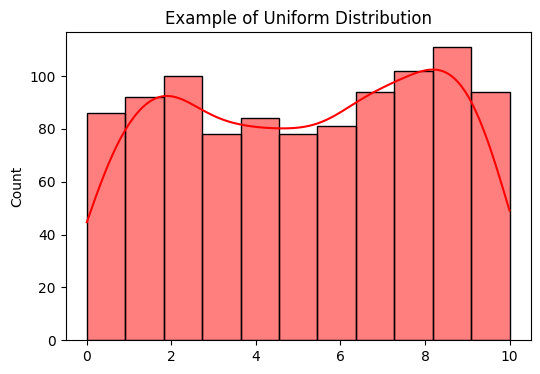


Categorical Summaries:

Frequency table for sex:


,count
sex,
Male,157
Female,87


Percentage distribution for sex:


,proportion
sex,
Male,64.344262
Female,35.655738



Frequency table for smoker:


,count
smoker,
No,151
Yes,93


Percentage distribution for smoker:


,proportion
smoker,
No,61.885246
Yes,38.114754



Frequency table for day:


,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


Percentage distribution for day:


,proportion
day,
Sat,35.655738
Sun,31.147541
Thur,25.409836
Fri,7.786885



Frequency table for time:


,count
time,
Dinner,176
Lunch,68


Percentage distribution for time:


,proportion
time,
Dinner,72.131148
Lunch,27.868852



Sampling and Bias:
Population Mean: 50.41
Mean of a random sample (size 50): 49.74
Mean of a biased sample (sampling from > 50): 72.36


In [ ]:
# Central Tendency (Mean, Median, Mode)
print("Central Tendency:")
display(df[numeric_cols].agg(['mean', 'median'])) # Mode might not be unique, requires different handling
for col in numeric_cols:
    try:
        mode_val = df[col].mode()[0] # mode() can return multiple values if tied
        print(f"Mode of {col}: {mode_val}")
    except IndexError:
        print(f"No unique mode for {col}")


# Dispersion (Variance, Standard Deviation)
print("\nDispersion:")
display(df[numeric_cols].agg(['var', 'std']))

# Distribution Types (Visualization)
print("\nDistribution Types:")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['total_bill'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Total Bill Distribution (Likely Skewed)')
sns.histplot(df['tip'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Tip Distribution (Likely Skewed)')
sns.histplot(df['size'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Size Distribution')
plt.tight_layout()
plt.show()

# Example of a normal distribution
normal_data = np.random.normal(loc=0, scale=1, size=1000)
plt.figure(figsize=(6,4))
sns.histplot(normal_data, kde=True, color='gold')
plt.title('Example of Normal Distribution')
plt.show()

# Example of a skewed distribution (Gamma)
gamma_data = np.random.gamma(shape=2, scale=2, size=1000)
plt.figure(figsize=(6,4))
sns.histplot(gamma_data, kde=True, color='purple')
plt.title('Example of Skewed Distribution (Gamma)')
plt.show()

# Example of a uniform distribution
uniform_data = np.random.uniform(low=0, high=10, size=1000)
plt.figure(figsize=(6,4))
sns.histplot(uniform_data, kde=True, color='red')
plt.title('Example of Uniform Distribution')
plt.show()


# Frequency Tables and Categorical Summaries
print("\nCategorical Summaries:")
for col in ['sex', 'smoker', 'day', 'time']:
    print(f"\nFrequency table for {col}:")
    display(df[col].value_counts())
    print(f"Percentage distribution for {col}:")
    display(df[col].value_counts(normalize=True) * 100)

# Sampling and Bias Example
print("\nSampling and Bias:")
population = np.random.randint(1, 101, 1000) # Population from 1 to 100
population_mean = np.mean(population)
print(f"Population Mean: {population_mean:.2f}")

# Random Sample (less likely to be biased)
random_sample = np.random.choice(population, size=50, replace=False)
random_sample_mean = np.mean(random_sample)
print(f"Mean of a random sample (size 50): {random_sample_mean:.2f}")

# Biased Sample (e.g., sampling only from the higher end)
biased_sample = np.random.choice(population[population > 50], size=50, replace=False)
biased_sample_mean = np.mean(biased_sample)
print(f"Mean of a biased sample (sampling from > 50): {biased_sample_mean:.2f}")

## 2 - Probability and Uncertainty

Goal: Understand basic probability concepts and apply them to the dataset.

Topics:
- Basic probability calculations
- Conditional probability
- Visualizing distributions from the data

Probability of a customer being female: 0.3566
Probability of a customer being a smoker: 0.3811
Probability of a customer dining at dinner time: 0.7213

Conditional Probability:
Probability of being a smoker given the customer is female: 0.3793
Probability of tipping > $5 given total bill > $40: 0.3000


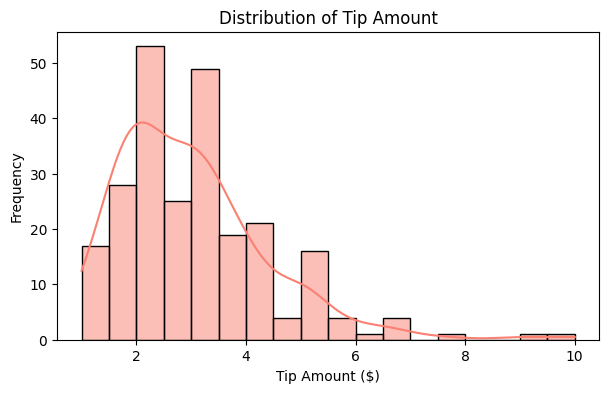

In [ ]:
# Probability demo with tips dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load tips dataset (already loaded in previous cells, but good practice to include)
if 'df' not in locals():
    df = sns.load_dataset('tips')

# Calculate basic probabilities
total_rows = len(df)
prob_female = df['sex'].value_counts(normalize=True).get('Female', 0)
prob_smoker = df['smoker'].value_counts(normalize=True).get('Yes', 0)
prob_dinner = df['time'].value_counts(normalize=True).get('Dinner', 0)

print(f"Probability of a customer being female: {prob_female:.4f}")
print(f"Probability of a customer being a smoker: {prob_smoker:.4f}")
print(f"Probability of a customer dining at dinner time: {prob_dinner:.4f}")

# Conditional Probability: Probability of being a smoker given they are female
# P(Smoker | Female) = P(Smoker and Female) / P(Female)
female_smokers = df[(df['sex'] == 'Female') & (df['smoker'] == 'Yes')]
prob_smoker_given_female = len(female_smokers) / len(df[df['sex'] == 'Female'])
print(f"\nConditional Probability:")
print(f"Probability of being a smoker given the customer is female: {prob_smoker_given_female:.4f}")

# Conditional Probability: Probability of tipping more than $5 given the total bill is more than $40
high_bill_high_tip = df[(df['total_bill'] > 40) & (df['tip'] > 5)]
high_bill = df[df['total_bill'] > 40]
prob_high_tip_given_high_bill = len(high_bill_high_tip) / len(high_bill) if len(high_bill) > 0 else 0
print(f"Probability of tipping > $5 given total bill > $40: {prob_high_tip_given_high_bill:.4f}")


# Illustrate a simple distribution from the data
plt.figure(figsize=(7, 4))
sns.histplot(df['tip'], kde=True, color='salmon')
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount ($)'); plt.ylabel('Frequency')
plt.show()

## 3 - Bivariate Analysis and Correlation

Goal: Analyze relationships between two variables.

Topics:
- Continuous-continuous: Pearson correlation coefficient (r)

Pearson Correlation (Total Bill vs Tip):
Pearson r = 0.6757, p-value = 0.0000


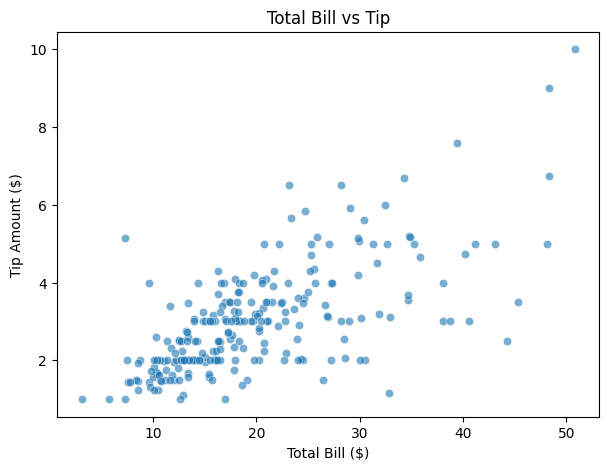

In [ ]:
# Bivariate analysis demo with tips dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import pandas as pd

# Load tips dataset (already loaded if running sequentially)
if 'df' not in locals():
    df = sns.load_dataset('tips')

# Continuous-continuous: Pearson correlation (e.g., total_bill vs tip)
print("Pearson Correlation (Total Bill vs Tip):")
r, pval = pearsonr(df['total_bill'], df['tip'])
print(f'Pearson r = {r:.4f}, p-value = {pval:.4f}')
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='total_bill', y='tip', alpha=0.6)
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill ($)'); plt.ylabel('Tip Amount ($)')
plt.show()

### Visualizing Correlation Matrix with Heatmap

A heatmap is a useful way to visualize the pairwise correlations between multiple numeric variables simultaneously.

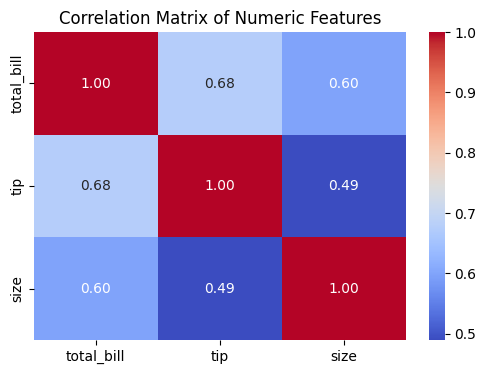

In [ ]:
# Heatmap of the correlation matrix
numeric_cols = ['total_bill', 'tip', 'size']
correlation_matrix = df[numeric_cols].corr(method='pearson')

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## 4 - Hypothesis Testing and Model Evaluation

Goal: Learn how to test claims using sample data: null hypothesis, alternative, p-values, t-tests, ANOVA, chi-square.

Instructor note: Discuss effect size and confidence intervals along with p-values.


In [ ]:
# Hypothesis testing demo: t-test, ANOVA, chi-square with tips dataset
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns

# Load tips dataset (already loaded if running sequentially)
if 'df' not in locals():
    df = sns.load_dataset('tips')

# T-test: Compare total bill for males vs females
print("T-test (Total Bill by Sex):")
male_bills = df[df['sex'] == 'Male']['total_bill']
female_bills = df[df['sex'] == 'Female']['total_bill']
t_stat, p_val_ttest = stats.ttest_ind(male_bills, female_bills, nan_policy='omit') # nan_policy='omit' handles potential missing values
print(f'Independent t-test (Male vs Female Total Bill): t = {t_stat:.4f}, p = {p_val_ttest:.4f}')


# Chi-square test: Relationship between sex and smoker
print("\nChi-square test (Sex vs Smoker):")
contingency_table_sex_smoker = pd.crosstab(df['sex'], df['smoker'])
chi2, p_chi, dof, expected = stats.chi2_contingency(contingency_table_sex_smoker)
print(f'Chi-square test (Sex vs Smoker): chi2 = {chi2:.4f}, p = {p_chi:.4f}, dof = {dof}')
print('Expected frequencies:\n', expected)


# ANOVA: Compare total bill across different days
print("\nANOVA (Total Bill by Day):")
# Create a list of total bills for each day
day_groups = [df['total_bill'][df['day'] == day] for day in df['day'].unique()]
# Remove empty groups if any (though unlikely with this dataset)
day_groups = [group for group in day_groups if not group.empty]

if len(day_groups) > 1: # ANOVA requires at least two groups
    f_stat, p_anova = stats.f_oneway(*day_groups)
    print(f'ANOVA test (Total Bill by Day): F = {f_stat:.4f}, p = {p_anova:.4f}')
else:
    print("Not enough groups (days) to perform ANOVA.")

T-test (Total Bill by Sex):
Independent t-test (Male vs Female Total Bill): t = 2.2778, p = 0.0236

Chi-square test (Sex vs Smoker):
Chi-square test (Sex vs Smoker): chi2 = 0.0000, p = 1.0000, dof = 1
Expected frequencies:
 [[59.84016393 97.15983607]
 [33.15983607 53.84016393]]

ANOVA (Total Bill by Day):
ANOVA test (Total Bill by Day): F = 2.7675, p = 0.0425


## 5 - Regression and Predictive Modeling

Goal: Present regression as a predictive tool and discuss overfitting, evaluation metrics, and bias-variance tradeoff.

Topics:
- Linear regression: coefficients, intercept, R^2, MSE
- Train/validation/test splits and cross-validation


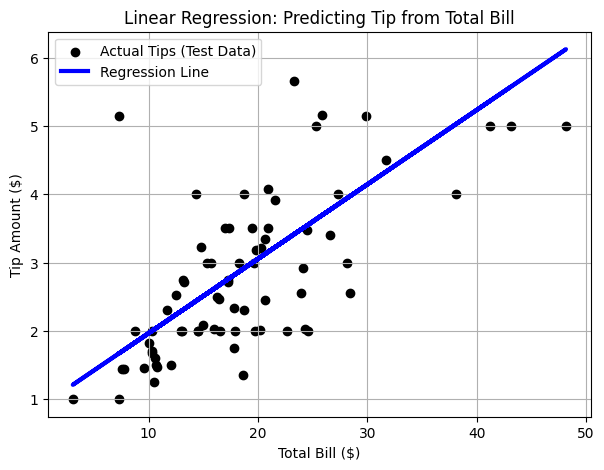

Coefficient: 0.109, Intercept: 0.877
R^2 (test): 0.429, MSE (test): 0.752


In [ ]:
# Regression demo: linear regression with train/test split on tips dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import pandas as pd

# Load tips dataset (already loaded if running sequentially)
if 'df' not in locals():
    df = sns.load_dataset('tips')

# Select features and target
X = df[['total_bill']] # Use total_bill as feature, reshape to be 2D
y = df['tip'] # Use tip as target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the linear regression model
model = LinearRegression().fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the results
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, color='black', label='Actual Tips (Test Data)')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.title('Linear Regression: Predicting Tip from Total Bill')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip Amount ($)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
print(f'Coefficient: {model.coef_[0]:.3f}, Intercept: {model.intercept_:.3f}')
print(f'R^2 (test): {r2_score(y_test, y_pred):.3f}, MSE (test): {mean_squared_error(y_test, y_pred):.3f}')

## 6 - Statistical Learning and Predictive Modeling

Goal: Tie earlier concepts into a predictive modeling workflow. Emphasize train/validate/test, cross-validation, metrics, and feature selection.


In [ ]:
# Logistic regression demo (binary classification)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

mask = iris.target != 2
X_bin = X[mask]
y_bin = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.3, random_state=42)
clf = LogisticRegression(max_iter=200).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 1.0
F1 score: 1.0
Confusion matrix:
 [[17  0]
 [ 0 13]]


## 7 - From Classical Statistics to Modern AI (Mapping)

Goal: Provide a concise mapping table and discussion prompts. Ask students where classical statistics is still essential in AI systems.


In [ ]:
import pandas as pd
mappings = [
    ('Descriptive stats', 'Data summarization / preprocessing'),
    ('t-test / ANOVA', 'Feature significance / model comparison'),
    ('Correlation / Regression', 'Predictive modeling'),
    ('PCA', 'Dimensionality reduction for ML'),
    ('Bayesian inference', 'Probabilistic models (Naive Bayes, Bayesian NN)'),
]
pd.DataFrame(mappings, columns=['Classical Statistics', 'AI / ML Role'])

,Classical Statistics,AI / ML Role
0,Descriptive stats,Data summarization / preprocessing
1,t-test / ANOVA,Feature significance / model comparison
2,Correlation / Regression,Predictive modeling
3,PCA,Dimensionality reduction for ML
4,Bayesian inference,"Probabilistic models (Naive Bayes, Bayesian NN)"




```
# This is formatted as code
```

## 8 - Ethics and Responsible AI

Goal: Explain how statistical choices affect fairness and trust. Discuss sampling bias, metric selection for imbalanced data, interpretability, and fairness concepts.


In [ ]:
# Ethics demo: imbalanced classification metrics
from sklearn.metrics import accuracy_score, f1_score

y_true = [0]*90 + [1]*10  # imbalanced
y_pred_all_negative = [0]*100
y_pred_perfect = [0]*90 + [1]*10

print('All-negative: Accuracy =', accuracy_score(y_true, y_pred_all_negative),
      'F1 =', f1_score(y_true, y_pred_all_negative, zero_division=0))
print('Perfect detection: Accuracy =', accuracy_score(y_true, y_pred_perfect),
      'F1 =', f1_score(y_true, y_pred_perfect))

All-negative: Accuracy = 0.9 F1 = 0.0
Perfect detection: Accuracy = 1.0 F1 = 1.0
